Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
2025 - Bimestre 5 <br>


<h1><center> Procesamiento de Lenguaje Natural

Ayudantía 1: Introducción a NLP </center></h1>
        **Profesor**: Marcelo Mendoza<br>
        **Ayudante**: Miguel Fernández

---

#Introducción

En este documento se presenta una mirada general de diferentes modelos que pueden ser utilizados en el contexto de Procesamiento del Lenguaje Natural (NLP). Para esto, se trabajará con los modelos abiertos disponibles en el sitio web de HuggingFace.

Se recomienda revisar su sitio web: https://huggingface.co/models   

# Reconocimiento de entidades

En primer lugar, se cargará la librería spacy.

In [1]:
!python3 -m spacy download es_core_news_md
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 18.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Utilizando el modelo **es_core_news_md** se obtendran las entidades nombradas en el siguiente texto:

**Título: CENIA impulsa el primer modelo de lenguaje colaborativo de Latinoamérica**

'LatamGPT es el nombre del primer modelo de lenguaje de gran tamaño (Large Language Model, LLM por sus siglas en inglés) que se está desarrollando de manera colaborativa en Latinoamérica y el Caribe. Coordinado por el Centro Nacional de Inteligencia Artificial (CENIA) e impulsado en conjunto con más de 30 instituciones de América Latina y el Caribe y más de 60 expertas y expertos, el proyecto cuenta con el apoyo del Ministerio de Ciencia, Tecnología, Conocimiento e Innovación en la coordinación internacional con los distintos estados de la región y el apoyo de recursos desde CAF para la ejecución del mismo

Actualmente, los modelos de lenguaje que han sido generados en el Norte Global y han estado expuesto a datos, no necesariamente reflejan la idiosincrasia y matices propios de Latinoamérica y el Caribe, una brecha de representatividad que conduce a limitaciones en su desempeño y puede generar inexactitudes o “alucinaciones” respecto de la información que involucra a nuestros países. El hecho se agrava con el uso cada más frecuente de datos sintéticos para el entrenamiento de modelos de otra generación

En febrero de 2023, se comenzó a trabajar en el primer LLM regional, en un modelo de lenguaje con un enfoque colaborativo en la construcción de las bases de datos, de modo que su entrenamiento reflejara la cultura, el lenguaje y la historia de Latinoamérica, ofreciendo información más precisa y representativa de los contextos locales.

“Uno de los problemas que tenemos en Latinoamérica y el Caribe es que los LLM que usamos, si bien funcionan en español y portugués, son bastante limitados en el conocimiento que tienen sobre la región. Al poco andar comienzan a alucinar, porque muy pocos de los datos con los que estos modelos fueron entrenados son de esta parte del mundo. Es importante que en la región podamos desarrollar capacidades para tener cierta independencia y tomar decisiones de cómo esta tecnología impacta a la sociedad. Hasta el momento no tenemos un modelo de lenguaje regional, y esta tarea no la puede asumir solo un grupo ni un solo país: es un desafío que requiere el esfuerzo de toda la región”, comenta Álvaro Soto, director de CENIA.

Por su parte, la ministra de Ciencia, Aisén Etcheverry, se refiere al proyecto como “un esfuerzo colectivo, abierto y que es reflejo de lo que esperamos sea este modelo de lenguaje. Cuando hablamos de Inteligencia Artificial, ésta tiene que proyectar el mundo que somos, su diversidad. Y en el caso de Latinoamérica, no solo hablar español o portugués, sino que entender nuestra idiosincrasia, aportar desde la cultura y desde la visión del mundo, y eso tiene que estar presente en el desarrollo”.

En comparación con otros modelos cerrados (o Propietary), el nuevo modelo de lenguaje LatamGPT será abierto, lo que implica que permitirá que más personas en América Latina y el Caribe lo estudien, usen y mejoren, construyendo sobre él.  “Esto democratiza el conocimiento y promueve el desarrollo de capacidades para poder entender mejor los modelos de lenguaje, sus aplicaciones y límites”, explica el gerente de CENIA., Rodrigo Durán.'


Comente los resultados.

Texto completo disponible en: https://cenia.cl/2025/02/13/cenia-impulsa-el-primer-modelo-de-lenguaje-colaborativo-de-latinoamerica/

Se carga el modelo.

In [2]:
sp = spacy.load('es_core_news_md')

In [3]:
texto = ''' LatamGPT es el nombre del primer modelo de lenguaje de gran tamaño (Large Language Model, LLM por sus siglas en inglés) que se está desarrollando de manera colaborativa en Latinoamérica y el Caribe. Coordinado por el Centro Nacional de Inteligencia Artificial (CENIA) e impulsado en conjunto con más de 30 instituciones de América Latina y el Caribe y más de 60 expertas y expertos, el proyecto cuenta con el apoyo del Ministerio de Ciencia, Tecnología, Conocimiento e Innovación en la coordinación internacional con los distintos estados de la región y el apoyo de recursos desde CAF para la ejecución del mismo

Actualmente, los modelos de lenguaje que han sido generados en el Norte Global y han estado expuesto a datos, no necesariamente reflejan la idiosincrasia y matices propios de Latinoamérica y el Caribe, una brecha de representatividad que conduce a limitaciones en su desempeño y puede generar inexactitudes o “alucinaciones” respecto de la información que involucra a nuestros países. El hecho se agrava con el uso cada más frecuente de datos sintéticos para el entrenamiento de modelos de otra generación

En febrero de 2023, se comenzó a trabajar en el primer LLM regional, en un modelo de lenguaje con un enfoque colaborativo en la construcción de las bases de datos, de modo que su entrenamiento reflejara la cultura, el lenguaje y la historia de Latinoamérica, ofreciendo información más precisa y representativa de los contextos locales.

“Uno de los problemas que tenemos en Latinoamérica y el Caribe es que los LLM que usamos, si bien funcionan en español y portugués, son bastante limitados en el conocimiento que tienen sobre la región. Al poco andar comienzan a alucinar, porque muy pocos de los datos con los que estos modelos fueron entrenados son de esta parte del mundo. Es importante que en la región podamos desarrollar capacidades para tener cierta independencia y tomar decisiones de cómo esta tecnología impacta a la sociedad. Hasta el momento no tenemos un modelo de lenguaje regional, y esta tarea no la puede asumir solo un grupo ni un solo país: es un desafío que requiere el esfuerzo de toda la región”, comenta Álvaro Soto, director de CENIA.

Por su parte, la ministra de Ciencia, Aisén Etcheverry, se refiere al proyecto como “un esfuerzo colectivo, abierto y que es reflejo de lo que esperamos sea este modelo de lenguaje. Cuando hablamos de Inteligencia Artificial, ésta tiene que proyectar el mundo que somos, su diversidad. Y en el caso de Latinoamérica, no solo hablar español o portugués, sino que entender nuestra idiosincrasia, aportar desde la cultura y desde la visión del mundo, y eso tiene que estar presente en el desarrollo”.

En comparación con otros modelos cerrados (o Propietary), el nuevo modelo de lenguaje LatamGPT será abierto, lo que implica que permitirá que más personas en América Latina y el Caribe lo estudien, usen y mejoren, construyendo sobre él. “Esto democratiza el conocimiento y promueve el desarrollo de capacidades para poder entender mejor los modelos de lenguaje, sus aplicaciones y límites”, explica el gerente de CENIA., Rodrigo Durán.
'''

Se aplica el modelo sobre el texto.

In [4]:
doc = sp(texto)

Se muestran las entidades nombradas en el documento.

In [5]:
for entity in doc.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

LatamGPT - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Large Language Model - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Latinoamérica - LOC - Non-GPE locations, mountain ranges, bodies of water
Caribe - LOC - Non-GPE locations, mountain ranges, bodies of water
Coordinado por el Centro Nacional de Inteligencia Artificial - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
CENIA - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
América Latina - LOC - Non-GPE locations, mountain ranges, bodies of water
Caribe - LOC - Non-GPE locations, mountain ranges, bodies of water
Ministerio de Ciencia - LOC - Non-GPE locations, mountain ranges, bodies of water
Tecnología - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
CAF - ORG - Companies, agencies, institutions, etc.
Norte Global - LOC - Non-GPE locations, mount

También es posible obtener una visualización que destaca las entidades en el texto.

In [6]:
spacy.displacy.render(doc, style='ent')

#Creación de resúmenes

Para esta tarea, se trabajará con el dataset CNN Daily News. Este conjunto de datos fue creado para entrenar modelos que generan resúmenes.



En primer lugar, se creará una conexión entre google colab y google drive. Esto facilita el manejo de archivos de gran tamaño.

In [7]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


A continuación, se carga el dataset:

In [8]:
path = "/content/gdrive/MyDrive/DOCTORADO/Ayudantía NLP (COURSERA)/versión 2/Ayudantía/AYUDANTIA 1/"

In [9]:
import pandas as pd
df_summarization = pd.read_csv(path + "CNN daily.csv")

In [10]:
df_summarization

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."
...,...,...,...
11485,ed8674cc15b29a87d8df8de1efee353d71122272,Our young Earth may have collided with a body ...,Oxford scientists say a Mercury-like body stru...
11486,2f58d1a99e9c47914e4b1c31613e3a041cd9011e,A man facing trial for helping his former love...,Man accused of helping former lover kill woman...
11487,411f6d57825161c3a037b4742baccd6cd227c0c3,A dozen or more metal implements are arranged ...,Marianne Power tried the tuning fork facial at...
11488,b5683ef8342056b17b068e0d59bdbe87e3fe44ea,Brook Lopez dominated twin brother Robin with ...,Brooklyn Nets beat the Portland Trail Blazers ...


Ejemplo del primer texto.

In [11]:
df_summarization.article[3]

"Liverpool target Neto is also wanted by PSG and clubs in Spain as Brendan Rodgers faces stiff competition to land the Fiorentina goalkeeper, according to the Brazilian's agent Stefano Castagna. The Reds were linked with a move for the 25-year-old, whose contract expires in June, earlier in the season when Simon Mignolet was dropped from the side. A January move for Neto never materialised but the former Atletico Paranaense keeper looks certain to leave the Florence-based club in the summer. Neto rushes from his goal as Juan Iturbe bears down on him during Fiorentina's clash with Roma in March . Neto is wanted by a number of top European clubs including Liverpool and PSG, according to his agent . It had been reported that Neto had a verbal agreement to join Serie A champions Juventus at the end of the season but his agent has revealed no decision about his future has been made yet. And Castagna claims Neto will have his pick of top European clubs when the transfer window re-opens in th

El largo del texto es de 308 palabras.

In [12]:
len(df_summarization.article[3].split())

308

El resumen correspondiente es:

In [13]:
df_summarization.highlights[3]

'Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined Firoentina\xa0from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, according to his agent .\nCLICK HERE for the latest Liverpool news .'

A continuación, se instala la librería Transformers.
Esta librería es fundamental para trabajar con modelos de código abierto.

Observación: Los siguientes modelos de aprendizaje profundo requieren contar con una GPU. Google nos entrega una alternativa gratis de 15 [GB]. Para activarlo, deben seguir los siguientes pasos:

1. Entorno de ejecución
2. Cambiar tipo de entorno de ejecución
3. En acelerador de hardware se debe seleccionar GPU T4.

Es importante considerar que estos recursos gratuitos están disponibles por un tiempo acotado.

In [14]:
!pip install transformers
from transformers import pipeline

En este caso, se utiliza el modelo BART. Para facilitar la manipulación del modelo, se trabaja con pipeline.

Más información en: https://huggingface.co/facebook/bart-large-cnn

In [16]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn") #Este modelo tiene un tamaño de 1.63 GB

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [17]:
#1 minuto por frase sin usar GPU
ejemplo = summarizer(df_summarization.article[3], max_length=128, truncation=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Resumen creado por el modelo

In [18]:
ejemplo

[{'summary_text': 'Fiorentina goalkeeper Neto is wanted by a number of top European clubs, according to his agent Stefano Castagna. Liverpool were linked with a move for the 25-year-old earlier in the season when Simon Mignolet was dropped from the side. A January move for Neto never materialised but the former Atletico Paranaense keeper looks certain to leave the Florence-based club in the summer.'}]

In [19]:
ejemplo[0]["summary_text"]

'Fiorentina goalkeeper Neto is wanted by a number of top European clubs, according to his agent Stefano Castagna. Liverpool were linked with a move for the 25-year-old earlier in the season when Simon Mignolet was dropped from the side. A January move for Neto never materialised but the former Atletico Paranaense keeper looks certain to leave the Florence-based club in the summer.'

Resumen anotado por humanos

In [20]:
df_summarization.highlights[3]

'Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined Firoentina\xa0from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, according to his agent .\nCLICK HERE for the latest Liverpool news .'

Artículo original

In [21]:
df_summarization.article[3]

"Liverpool target Neto is also wanted by PSG and clubs in Spain as Brendan Rodgers faces stiff competition to land the Fiorentina goalkeeper, according to the Brazilian's agent Stefano Castagna. The Reds were linked with a move for the 25-year-old, whose contract expires in June, earlier in the season when Simon Mignolet was dropped from the side. A January move for Neto never materialised but the former Atletico Paranaense keeper looks certain to leave the Florence-based club in the summer. Neto rushes from his goal as Juan Iturbe bears down on him during Fiorentina's clash with Roma in March . Neto is wanted by a number of top European clubs including Liverpool and PSG, according to his agent . It had been reported that Neto had a verbal agreement to join Serie A champions Juventus at the end of the season but his agent has revealed no decision about his future has been made yet. And Castagna claims Neto will have his pick of top European clubs when the transfer window re-opens in th

#Análisis de sentimientos

Para esta tarea se puede utilizar la librería pysentimiento.

Más información en: https://github.com/pysentimiento/pysentimiento

In [22]:
!pip install pysentimiento

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 14.2 MB/s eta 0:00:00


A continuación, se instancia el modelo para la tarea de identificación de sentimiento para español.

In [23]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

Ejemplos

In [24]:
analyzer.predict("Qué gran jugador es Messi")

AnalyzerOutput(output=POS, probas={POS: 0.946, NEU: 0.037, NEG: 0.017})

In [25]:
analyzer.predict("Esto es pésimo")

AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.098, POS: 0.014})

In [26]:
analyzer.predict("Qué es esto?")

AnalyzerOutput(output=NEU, probas={NEU: 0.548, NEG: 0.412, POS: 0.041})

# Traducción automática

Con el siguiente modelo se puede traducir entre español e inglés

In [27]:
from transformers import pipeline
estoen = pipeline('translation', model='Helsinki-NLP/opus-mt-es-en')#, device="cuda"
entoes = pipeline('translation', model='Helsinki-NLP/opus-mt-en-es')#, device="cuda"

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Ejemplo para español a inglés.

In [28]:
english = estoen("Me interesa aprender python para crear modelos de inteligencia artificial")[0]['translation_text']
english

"I'm interested in learning Python to create artificial intelligence models"

Ejemplo para inglés a español.

In [29]:
spanish = entoes("I'm interested in learning Python to create artificial intelligence models")[0]['translation_text']
spanish

'Estoy interesado en aprender Python para crear modelos de inteligencia artificial'

#Representación de conocimiento

Se pueden crear representaciones vectoriales de palabras, oraciones o documentos.

En este ejemplo, se trabajará con un dataset que incluye comentarios sobre 8 temáticas distintas.

En primer lugar, se carga el dataset.

In [30]:
import pandas as pd
df_sbert = pd.read_csv(path + "Dataset 3 - SentenceBERT.csv")

In [31]:
df_sbert

,text,target,title,date
0,I was wondering if anyone out there could enli...,7,rec.autos,2024-04-20 05:19:53.092157
1,I recently posted an article asking what kind ...,7,rec.autos,2024-04-20 05:19:53.092157
2,\nIt depends on your priorities. A lot of peo...,7,rec.autos,2024-04-20 05:19:53.092157
3,an excellent automatic can be found in the sub...,7,rec.autos,2024-04-20 05:19:53.092157
4,: Ford and his automobile. I need information...,7,rec.autos,2024-04-20 05:19:53.092157
...,...,...,...,...
4757,Secrecy in Clipper Chip\n\nThe serial number o...,11,sci.crypt,2024-04-20 05:19:53.092157
4758,Hi !\n\nI am interested in the source of FEAL ...,11,sci.crypt,2024-04-20 05:19:53.092157
4759,"The actual algorithm is classified, however, t...",11,sci.crypt,2024-04-20 05:19:53.092157
4760,\n\tThis appears to be generic calling upon th...,11,sci.crypt,2024-04-20 05:19:53.092157


A continuación, se instalan las librerías que son necesarias.

In [32]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 5.1.2
    Uninstalling sentence-transformers-5.1.2:
      Successfully uninstalled sentence-transformers-5.1.2


In [33]:
sentence_model = SentenceTransformer("bert-base-uncased") #El modelo BERT es una buena alternativa para trabajar en inglés.

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Se crea una lista con la columna text del dataset.

In [34]:
data = df_sbert["text"].astype(str).values.tolist()

In [35]:
data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

A continuación, se aplica el modelo para construir representaciones numéricas para cada frase.

In [36]:
#Si se utiliza GPU demora 1 minuto.
document_embeddings = sentence_model.encode(data, show_progress_bar=True)

Batches:   0%|          | 0/149 [00:00<?, ?it/s]

Luego, se crea un dataframe con las presentaciones vectoriales de cada frase. Cada oración está representada por un vector de dimensión 768.

In [37]:
df_embedding_BERT = pd.DataFrame(document_embeddings)

In [38]:
df_embedding_BERT

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.089775,0.013652,0.342424,-0.029599,0.454611,-0.155420,0.028683,0.677552,0.054108,-0.056500,...,-0.201859,-0.205297,-0.024076,-0.367480,-0.179610,-0.189014,-0.010652,-0.237815,0.097011,-0.165627
1,-0.129728,0.005115,0.654194,-0.144817,0.432281,-0.087327,-0.049177,0.336230,-0.070653,-0.023974,...,-0.149205,-0.078494,0.057314,-0.424690,-0.149908,-0.230418,-0.335527,-0.137071,-0.014233,-0.140475
2,0.023834,0.067769,0.204187,0.062082,0.218925,0.072233,0.076897,0.612629,0.231372,-0.226085,...,-0.374223,-0.237243,0.032697,-0.252716,0.097724,-0.258354,-0.008340,-0.236641,-0.093745,-0.102768
3,-0.368126,-0.050276,0.384580,-0.023271,0.238612,0.016748,0.161599,0.391614,0.187594,-0.180459,...,-0.085896,-0.236118,-0.018853,-0.278446,-0.001339,-0.128894,0.084995,-0.207464,0.042922,0.077133
4,-0.124665,0.285257,0.522662,0.029893,0.128232,-0.094822,0.178583,0.625662,-0.226715,-0.113549,...,-0.096788,-0.047858,-0.019114,-0.242549,-0.114431,-0.180721,-0.013937,-0.035261,0.236439,-0.040709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,-0.134307,-0.024430,0.204336,-0.020176,0.321668,-0.077226,0.177534,0.139804,0.080416,0.053972,...,-0.111625,-0.084802,0.034862,-0.235520,-0.188523,0.202765,-0.036468,-0.101199,-0.088310,0.614945
4758,0.074847,-0.069484,0.295646,-0.109075,0.378729,-0.353335,0.107715,0.469267,-0.043433,-0.132598,...,-0.084600,-0.250242,0.111643,-0.449706,-0.131604,0.281609,-0.072136,-0.218927,0.111901,0.260192
4759,0.067195,0.100350,0.375749,-0.027123,0.367559,-0.249963,0.028483,0.231922,0.041288,-0.070385,...,-0.242001,-0.362328,0.031719,-0.354739,-0.290890,0.316412,0.212746,-0.128654,0.203274,0.285137
4760,0.153559,0.170168,0.264868,-0.013975,0.261926,-0.105343,0.135711,0.454433,-0.111993,-0.034889,...,-0.356435,-0.039878,0.050524,-0.337748,-0.151264,-0.081425,0.088432,-0.033736,0.207375,0.170841


En la siguiente celda se incluye la categoría a la que pertenece cada frase.

In [39]:
df_embedding_BERT["title"] = df_sbert["title"]

In [40]:
df_embedding_BERT.head(2)

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,title
0,-0.089775,0.013652,0.342424,-0.029599,0.454611,-0.155420,0.028683,0.677552,0.054108,-0.056500,...,-0.205297,-0.024076,-0.36748,-0.179610,-0.189014,-0.010652,-0.237815,0.097011,-0.165627,rec.autos
1,-0.129728,0.005115,0.654194,-0.144817,0.432281,-0.087327,-0.049177,0.336230,-0.070653,-0.023974,...,-0.078494,0.057314,-0.42469,-0.149908,-0.230418,-0.335527,-0.137071,-0.014233,-0.140475,rec.autos


Para crear una representación visual que permita reconocer la cercanía entre documentos, se reducirá dimensionalidad mediante las técnicas TSNE y UMAP.

In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
X = df_embedding_BERT.iloc[:,:768]
target= df_embedding_BERT["title"]

#Este método toma 1 minuto
tsne = TSNE(n_components=2, perplexity=10, max_iter=250)
X_tsne = tsne.fit_transform(X)

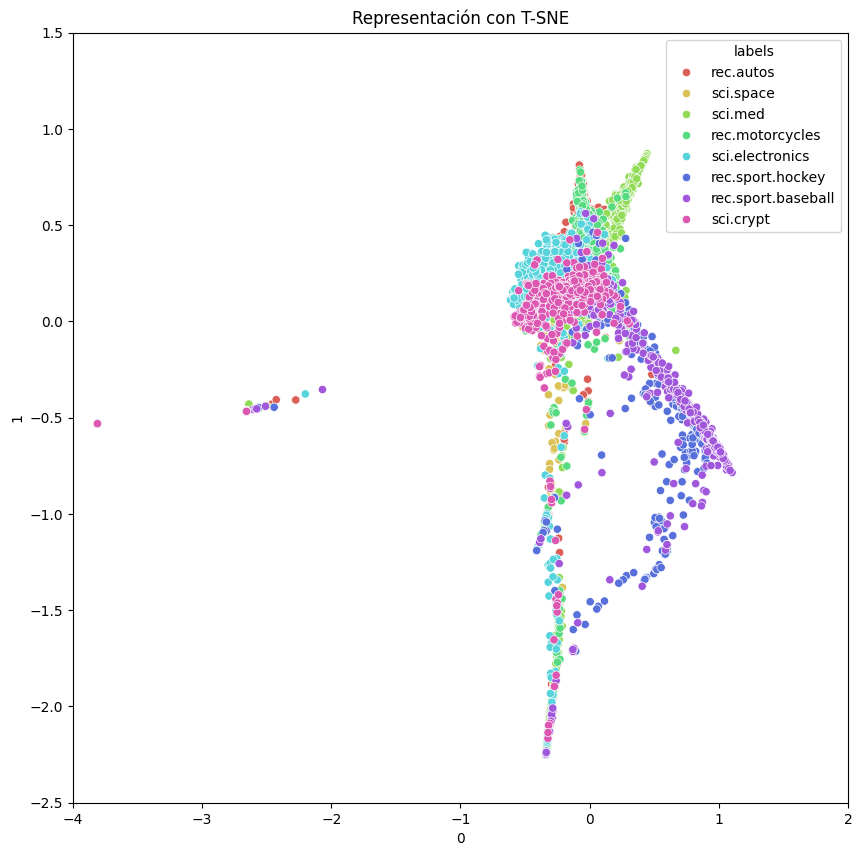

In [43]:
plt.figure(figsize=(10,10))
labels = df_embedding_BERT["title"]
df = pd.DataFrame(X_tsne)
df["labels"] = labels
sns.scatterplot(data=df, x=0, y=1, hue="labels",palette='hls')
plt.title("Representación con T-SNE")
plt.xlim(-4,2) #Ajustar dependiendo del gráfico obtenido
plt.ylim(-2.5,1.5)
plt.show()

Creando la representación con UMAP

In [44]:
#Demora 2 minutos
import umap
umap_ = umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.3, metric='euclidean')
X_umap = umap_.fit_transform(X)

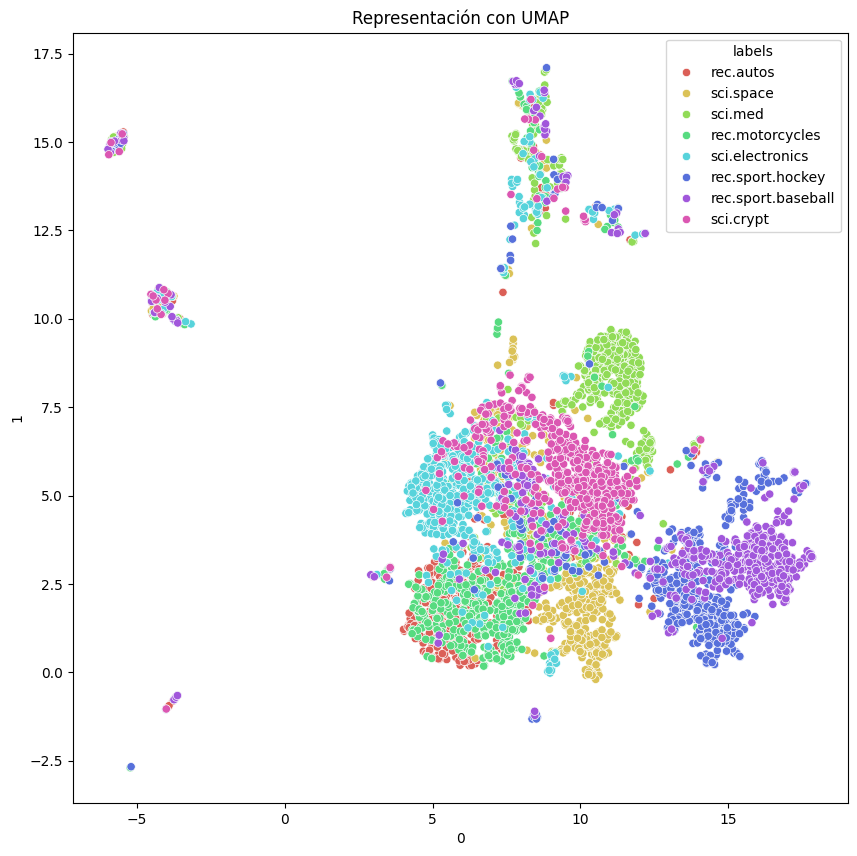

In [45]:
plt.figure(figsize=(10,10))
labels = df_embedding_BERT["title"]
df = pd.DataFrame(X_umap)
df["labels"] = labels
sns.scatterplot(data=df, x=0, y=1, hue="labels",palette='hls')
plt.title("Representación con UMAP")
# plt.xlim(-2,4) #Ajustar dependiendo del gráfico obtenido
# plt.ylim(-1,2.5)
plt.show()

# Generación de texto

Para este caso, se trabajará con el modelo GPT 3.5 turbo. Para su correcto funcionamiento deben contar con una api key.

A continuación, se instala la librería de openai.

In [46]:
!pip install openai

In [6]:
import openai
import time

Para no entregar su api key por error, se recomienda crear un archivo .py con la información y cargarlo en cada ejecución.

In [7]:
from parameter_api import API_KEY_personal

openai.api_key = API_KEY_personal #No entregar API KEY. Es mejor crear un archivo .py con esta información y cargarlo cada vez que se use.

In [8]:
def historia(objeto_1, objeto_2, temperature=0.7):
    response = openai.chat.completions.create(
    model = "gpt-3.5-turbo",
    messages = [{"role": "user",
                "content": f'''Crea una diálogo entre los siguientes dos personajes "{objeto_1}", "{objeto_2}". Cada uno debe interactuar tres veces.
                La salida debe incluir el nombre del personaje con el texto señalado'''}],
    temperature = temperature
    )
    answer = response.choices[0].message.content

    return answer

In [9]:
salida_1 = historia("Lebron James","Michael Jackson")
print(salida_1)

Lebron James: Hola Michael, es un honor conocerte. Eres una leyenda en la música.

Michael Jackson: Gracias Lebron, el honor es mío. Eres un verdadero icono en el baloncesto.

Lebron James: ¿Cómo te inspiras para crear música tan increíble?

Michael Jackson: La inspiración viene de todas partes, Lebron. Me gusta observar el mundo a mi alrededor y plasmarlo en mis canciones.

Lebron James: Eso es fascinante. A mí me inspira la pasión por el juego y la dedicación al entrenamiento. ¿Qué te motiva a seguir creando música?

Michael Jackson: Mi mayor motivación es el amor por la música y el deseo de llevar alegría a las personas a través de mis canciones. Esa es mi verdadera pasión, al igual que tu pasión por el baloncesto, Lebron.

Lebron James: ¡Increíble! Gracias por compartir tus pensamientos conmigo, Michael. Eres realmente un artista excepcional.


# Generación de texto con RAG

Para la creación de este sistema se trabajará con el framework LangChain.

Más información en: https://www.langchain.com/

In [51]:
!pip install langchain

In [52]:
!pip install langchain-community wikipedia

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=b14ac4643ce9ab926bdb4baec6bdb61a287ae470fa8f0008aa65e87bdb0ac80c
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 

In [1]:
!pip install -qU langchain-openai

In [3]:
#ChatOpenAI
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings

#Wikipedia
from langchain_classic.retrievers import WikipediaRetriever

Pregunta directa a GPT 3.5-turbo

In [4]:
question = "Who are the current NBA champions?"

In [10]:
response = openai.chat.completions.create(model = "gpt-3.5-turbo",
                                          messages = [{"role": "user",
                                                       "content": f'''{question}'''}],
                                          temperature = 0.5)

answer = response.choices[0].message.content
print(answer)

The current NBA champions are the Milwaukee Bucks, who won the 2021 NBA Finals.


Como se puede observar, el modelo entregó información correcta pero de la temporada 2020-2021. Este hecho era esperable ya que el modelo GPT 3.5 no está actualizado al 2024.

Si se prueba con GPT-4o mini, se obtiene lo siguiente:

In [11]:
response = openai.chat.completions.create(model = "gpt-4o-mini",
                                          messages = [{"role": "user",
                                                       "content": f'''{question}'''}],
                                          temperature = 0.5)

answer = response.choices[0].message.content
print(answer)

As of October 2023, the current NBA champions are the Denver Nuggets. They won the championship in June 2023, defeating the Miami Heat in the NBA Finals.


A pesar de obtener una respuesta más actualizada, sigue siendo incorrecta.

Para resolver lo anterior, se puede trabajar con el enfoque **Retrieval-augmented generation (RAG)**. En la siguiente imagen se presenta un esquema con su forma de operar.

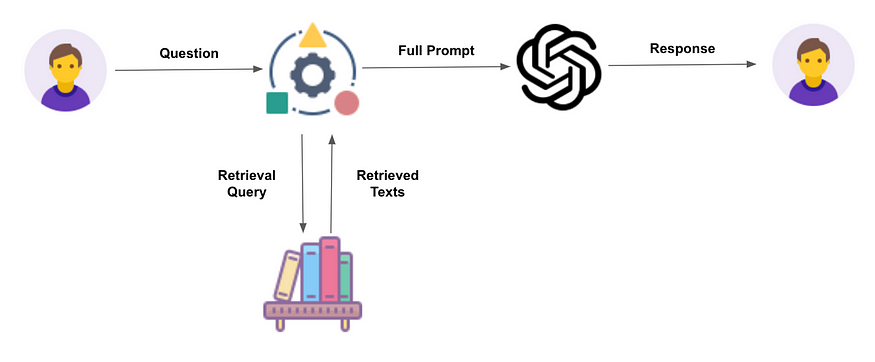

En la siguiente celda se instancia el objeto retriever para obtener información desde wikipedia.

In [12]:
retriever_en = WikipediaRetriever(lang="en",
                               load_max_docs=5, #default son 100
                               load_all_available_meta=False)

Luego, se realizará una búsqueda en wikipedia usando NBA champions

In [13]:
contexto_en = retriever_en.invoke("NBA champions")

A continuación, se presenta el contexto obtenido. Esta respuesta está en inglés dado que el hiperparámetro entregado a WikipediaRetriever indicó este requerimiento.

In [14]:
contexto_en

[Document(metadata={'title': 'List of NBA champions', 'summary': "The NBA Finals is the annual championship series for the National Basketball Association (NBA) held at the conclusion of its postseason. All NBA Finals have been played in a best-of-seven format, and are contested between the winners of the Eastern Conference and the Western Conference (prior to 1971 it was played between division playoff winners), except in 1950 when the Eastern Division champion faced the winner between the Western and Central Division champions. From 1946 through 1949, when the league was known as the Basketball Association of America (BAA), the playoffs were a three-stage tournament where the two semifinal winners played each other in the finals. The winning team of the series receives the Larry O'Brien Championship Trophy, which has been awarded since 1977 (between 1947 and 1976 the winning team received the Walter A. Brown Trophy).", 'source': 'https://en.wikipedia.org/wiki/List_of_NBA_champions'},

Es importante notar que lo obtenido es una lista con metadata. Esto es importante ya que podría ser útil incorporar estos elementos para profundizar en algún punto particular.

Note que la salida de este retriever incluye 3 páginas. A continuación, se presenta cada una.

In [15]:
len(contexto_en)

3

Ver página 1

In [16]:
contexto_en[0].page_content

'The NBA Finals is the annual championship series for the National Basketball Association (NBA) held at the conclusion of its postseason. All NBA Finals have been played in a best-of-seven format, and are contested between the winners of the Eastern Conference and the Western Conference (prior to 1971 it was played between division playoff winners), except in 1950 when the Eastern Division champion faced the winner between the Western and Central Division champions. From 1946 through 1949, when the league was known as the Basketball Association of America (BAA), the playoffs were a three-stage tournament where the two semifinal winners played each other in the finals. The winning team of the series receives the Larry O\'Brien Championship Trophy, which has been awarded since 1977 (between 1947 and 1976 the winning team received the Walter A. Brown Trophy).\n\n\n== Champions ==\n\nThe most recent champions are the Oklahoma City Thunder, who won their first championship since relocating 

Ver página 2

In [17]:
contexto_en[1].page_content

"The National Basketball Association (NBA) is a professional basketball league in North America composed of 30 teams (29 in the United States and 1 in Canada). The NBA is one of the major professional sports leagues in the United States and Canada and is considered the premier professional basketball league in the world. The league is headquartered in Midtown Manhattan.\nThe NBA was created on August 3, 1949, with the merger of the Basketball Association of America (BAA) and the National Basketball League (NBL). The league later adopted the BAA's history and considers its founding on June 6, 1946, as its own. In 1976, the NBA and the American Basketball Association (ABA) merged, adding four franchises to the NBA. The NBA's regular season runs from October to April, with each team playing 82 games. The league's playoff tournament extends into June, culminating with the NBA Finals championship series.\nThe NBA is an active member of USA Basketball (USAB), which is recognized by the Inter

Ver página 3

In [18]:
contexto_en[2].page_content

"The NBA G League Finals is the championship game or series for the NBA G League and the conclusion of the league's postseason. The league was previously known as the National Basketball Development League (NBDL) from 2001 to 2005 and the National Basketball Association Development League (NBA D-League) from 2005 to 2017.\nSince the league's inception in 2001–02, a variety of formats has been used to determine the champion. From the inaugural postseason in 2002 until 2006, the four teams with the best records advanced to the postseason. In the first two seasons, both the semifinal round and the Finals were held in a best-of-three format. Then, between 2004 and 2007, the playoffs used a single-elimination tournament among the four teams, with two semifinal games and one winner-take-all championship match.\nIn 2007, the league expanded to twelve teams and was divided into Eastern and Western Conferences, comprising six teams each. All playoff rounds were one game each, ending with the Ea

Para evaluar la sensibilidad de este enfoque, se obtendrán tres salidas distintas, una por página.

A continuación, se define una función para incorporar el contexto. Note que la función requiere 3 variables:
* pregunta
* contexto
* temperature --> Por defecto inicia en 0.

In [19]:
def answer_context(pregunta, contexto, temperature=0.0):
    response = openai.chat.completions.create(#openai.ChatCompletion.create(
    model = "gpt-4o-mini",
    messages = [{"role": "user",
                "content": f'''Answer the question: {pregunta}, considering the following context: {contexto}'''}],
    temperature = temperature
    )
    answer = response.choices[0].message.content

    return answer

Respuesta con página 1

In [20]:
respuesta_0 = answer_context(pregunta="Who are the current NBA champions?",
                             contexto = contexto_en[0].page_content)
respuesta_0

'The current NBA champions are the Oklahoma City Thunder, who won their first championship since relocating from Seattle in 2008 and their first since 1979 as the Seattle SuperSonics.'

Respuesta con la página 2

In [21]:
respuesta_1 = answer_context(pregunta="Who are the current NBA champions?",
                             contexto = contexto_en[1].page_content)
respuesta_1

'The current NBA champions are the Oklahoma City Thunder, who won the title by defeating the Indiana Pacers in the 2025 NBA Finals. This victory marked their first championship since moving to Oklahoma City in 2008 and their second overall, having previously won in 1979 as the Seattle SuperSonics.'

Respuesta con la página 3

In [22]:
respuesta_2 = answer_context(pregunta="Who are the current NBA champions?",
                             contexto = contexto_en[2].page_content)
respuesta_2

'The context provided does not specify the current NBA champions. However, as of my last knowledge update in October 2023, the Denver Nuggets were the reigning NBA champions, having won the championship in June 2023. Please verify with the latest sources for the most current information.'

Notar que esta tercera respuesta menciona que el contexto entregado no es útil para responder la pregunta. Luego, indica la información asociada a los datos de entrenamiento.